#This project is the part of **Edunet Foundation** internship
NAME: BALANITHISH.G

PROJECT: Hotel booking demand with Machine Learning


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('hotel_bookings.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
hotel = pd.read_csv('hotel_bookings.csv.zip')
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotel.shape

(119390, 32)

In [11]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

In [12]:
nan_replacements = {'children': 0.0, 'country': 'Unknown', 'agent': 0, 'company': 0}
df = hotel.fillna(nan_replacements)

In [13]:
df['adr'] = df['adr'].apply(lambda x: round(x))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98,0,1,Check-Out,2015-07-03


In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.826610,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.000000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.537273,0.245291,0.792798,NaN


In [15]:
df.select_dtypes(include=['object']).describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


# **Recommended Analysis**

**What is the relationship between lead time and cancellation?**

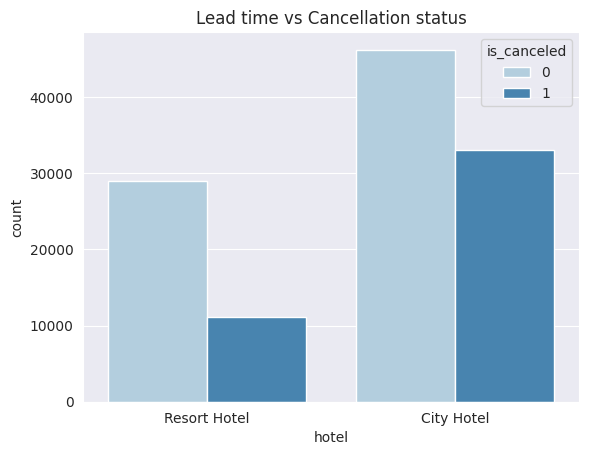

In [16]:
plt.figure()
ax = sns.countplot(x= 'hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels,_ = ax.get_legend_handles_labels()
plt.title('Lead time vs Cancellation status', size=12)
plt.show()

**What is the relationship between deposit type and cancellation?**

is_canceled       0      1
deposit_type              
No Deposit    74947  29694
Non Refund       93  14494
Refundable      126     36


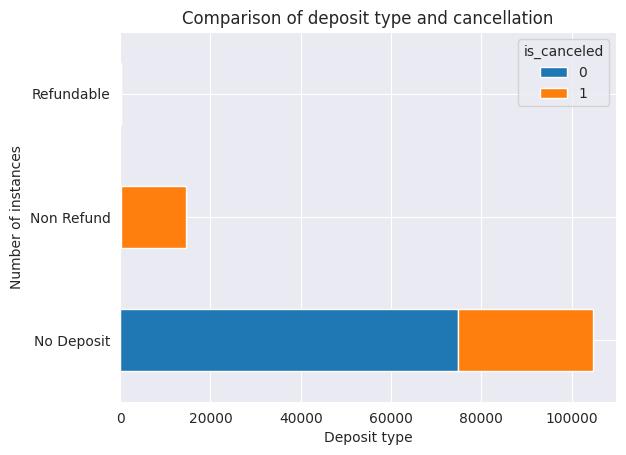

In [17]:
#Using the pivot_table() method to create a pivot table with the number of instances for each unique value of is_canceled and deposit_type
pivot_table = hotel.pivot_table(index='deposit_type', columns='is_canceled', values='lead_time', aggfunc='count')
print(pivot_table)
pivot_table.plot(kind='barh', stacked=True)

plt.title('Comparison of deposit type and cancellation')
plt.xlabel('Deposit type')
plt.ylabel('Number of instances')

plt.xticks(rotation=0)
plt.show()

**What is the relationship between market segment and cancellation?**

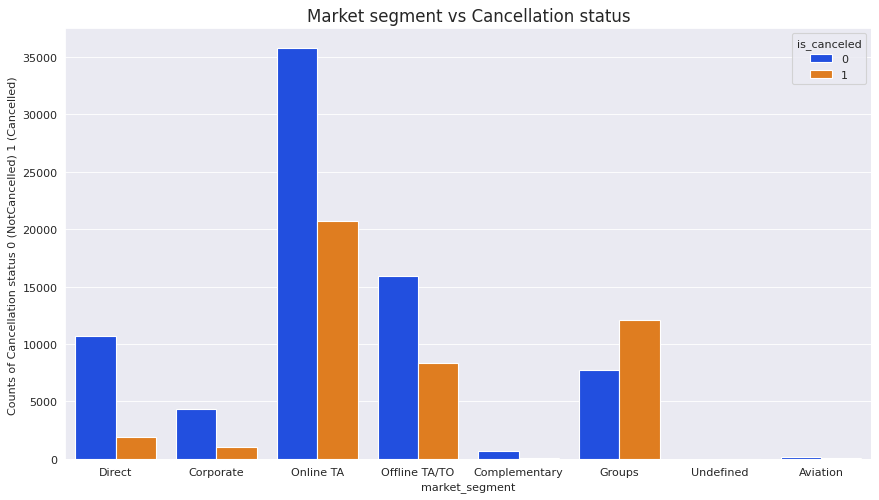

In [18]:
plt.figure(figsize=(13, 7), dpi=80)
ax = sns.countplot(x= 'market_segment', hue='is_canceled', data=df, palette='bright')
legend_labels,_ = ax.get_legend_handles_labels()

plt.title('Market segment vs Cancellation status', size=15)
plt.ylabel('Counts of Cancellation status 0 (NotCancelled) 1 (Cancelled) ')
plt.show()

**What is the relationship between previous cancellations and cancellations?**

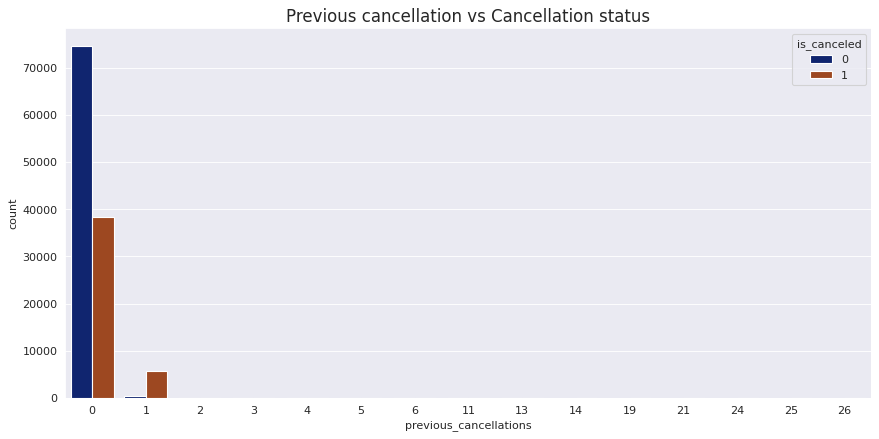

In [19]:
plt.figure(figsize=(13, 6), dpi=80)
ax=sns.countplot(x='previous_cancellations', hue='is_canceled', data=df, palette='dark')

legend_labels,_ = ax.get_legend_handles_labels()
plt.title('Previous cancellation vs Cancellation status', size=15)
plt.show()

**How much does the price in hotels vary over the year?**

arrival_date_year
2015     87.18
2016     98.32
2017    114.63
Name: adr, dtype: float64


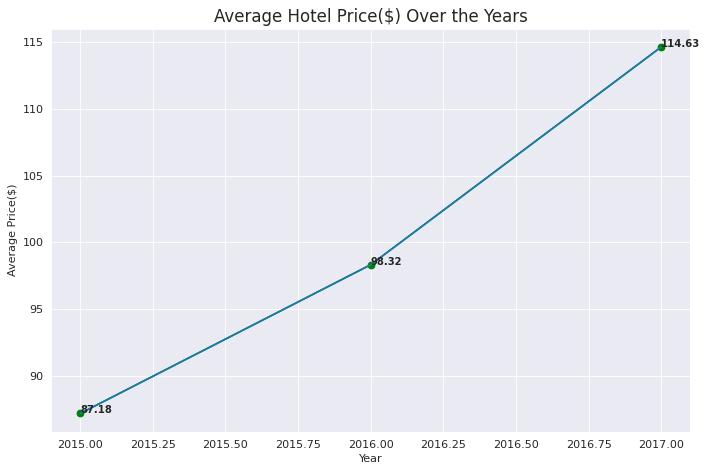

In [20]:
average_price = df.groupby('arrival_date_year')['adr'].mean().round(decimals=2)
print(average_price)
plt.figure(figsize=(9, 6), dpi=80)
average_price.plot(kind='line', marker='o', color='green')

plt.plot(average_price.index.values, average_price.values)
for ind,score in zip(average_price.index.values, average_price.values):
    plt.text(ind,score,str(score), fontweight='bold', fontsize=9)

plt.title('Average Hotel Price($) Over the Years', size=15)
plt.xlabel('Year')
plt.ylabel('Average Price($)')
# plt.grid(True)

plt.tight_layout()
plt.show()

**What are the top 10 countries with the highest number of reservation cancellations?**

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64


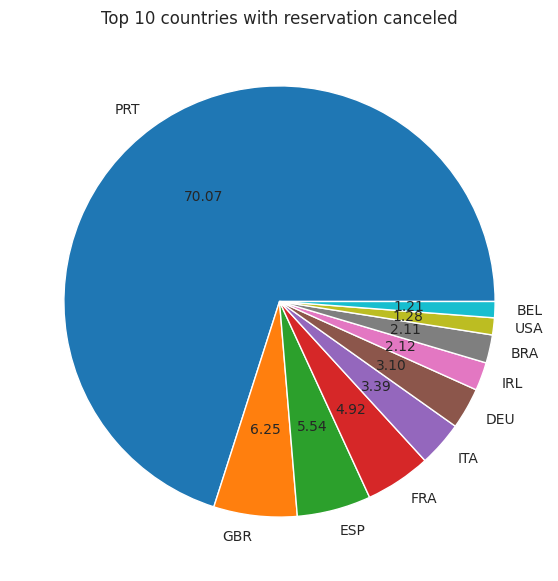

In [21]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
print(top_10_country)

plt.figure(figsize = (7,7))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

country
ABW    128.50
AGO    117.12
AIA    265.00
ALB     84.33
AND    202.71
Name: adr, dtype: float64


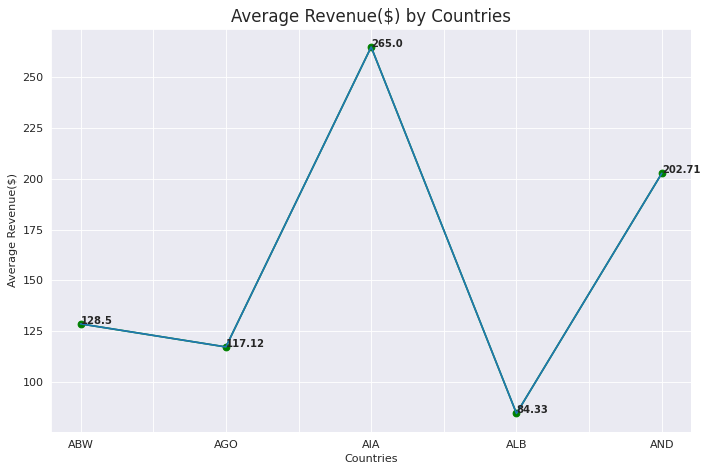

In [22]:
revenue_by_countries = df.groupby('country')['adr'].mean().round(decimals=2).head()
print(revenue_by_countries)

plt.figure(figsize=(9, 6), dpi=80)
revenue_by_countries.plot(kind='line', marker='o', color='green')

plt.plot(revenue_by_countries.index.values, revenue_by_countries.values)

for ind,score in zip(revenue_by_countries.index.values, revenue_by_countries.values):
    plt.text(ind,score,str(score), fontweight='bold', fontsize=9)

plt.title('Average Revenue($) by Countries', size=15)
plt.xlabel('Countries')
plt.ylabel('Average Revenue($)')

plt.tight_layout()
plt.show()

In [23]:
print(df.reservation_status.value_counts())
reserve_stats = df['reservation_status'].value_counts()

colors = ['plum', 'orange', 'dodgerblue']

fig = px.pie(reserve_stats, values=reserve_stats.values, names=reserve_stats.index, title='Reservation Status', hole=0.5)
fig.update_traces(marker=dict(colors=colors))
fig.show()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


hotel
City Hotel      255980
Resort Hotel     21142
Name: days_in_waiting_list, dtype: int64


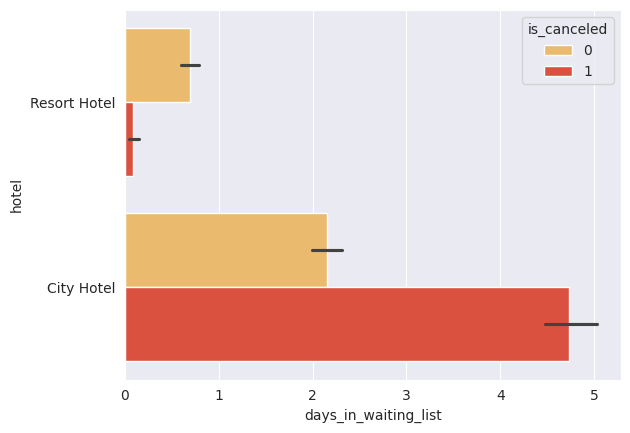

In [24]:
print(df.groupby('hotel')['days_in_waiting_list'].sum())
plt.figure()
sns.barplot(data=df, x='days_in_waiting_list', y='hotel', hue='is_canceled', palette='YlOrRd')
plt.show()

In [26]:
repeated_guests = df.groupby('is_repeated_guest')['is_canceled'].sum()
print(repeated_guests)
colors = ['cyan', 'hotpink']

legend_labels = {0: '0 (Not Repeated)', 1: '1 (Repeated)'}

fig = px.pie(
    names=[legend_labels[i] for i in repeated_guests.index],
    values=repeated_guests.values,
    title='Repeated Guests Vs Cancellation',
    hole=0.5
)

fig.update_traces(marker=dict(colors=colors))

is_repeated_guest
0    43672
1      552
Name: is_canceled, dtype: int64


In [29]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,158,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104,0,0,Check-Out,2017-09-07
